<a href="https://colab.research.google.com/github/AnaRaquelCafe/Prevendo_Formandos_Faculdade_MLET/blob/main/Conhecendo_algoritmos_de_machine_learning_modelos_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predizendo a evasão de estudantes e sucesso acadêmico 🎓

### Sobre a base de dados 🎲

Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de várias bases de dados disjuntas) relacionado a alunos matriculados em diferentes cursos de graduação, como **agronomia, design, educação, enfermagem, jornalismo, administração, serviço social e tecnologias**.

O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno (percurso acadêmico, demografia e fatores socioeconômicos) e o desempenho acadêmico do aluno no final do primeiro e segundo semestres.

### Nossos objetivos 🚀

O conjunto de dados foi criado no âmbito de um projeto que visa contribuir para a redução do abandono e insucesso académico no ensino superior, através da utilização de técnicas de aprendizagem automática para identificar alunos em risco numa fase inicial do seu percurso académico, de modo a que estratégias de apoio aos mesmos possam ser postas em prática. O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno, trajetória acadêmica, demografia e fatores socioeconômicos. O problema é formulado como uma tarefa de classificação de três categorias (abandono, matriculado e graduado) ao final da duração normal do curso.

- Criar modelos uma pipeline preditiva de um modelo de classificação 🎯


### Sobre a fonte de dados:

Este conjunto de dados é apoiado pelo programa SATDAP - Capacitação da Administração Pública ao abrigo da bolsa POCI-05-5762-FSE-000191, Portugal.

## Analisando a qualidade dos dados 🧹🎲

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [26]:
! pip install pandas

In [27]:
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas
df = pd.read_excel("StudentsPrepared.xlsx")
df.head()

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,0,0,1,Masculino,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
1,Solteiro,Turismo,Ensino Secundário,160.0,Português,142.5,0,0,0,Masculino,0,0,0,6,6,6,1.400000e+01,0,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduado
2,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,0,0,0,Masculino,0,0,0,6,0,0,0.000000e+00,0,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
3,Solteiro,Jornalismo e Comunicação,Ensino Secundário,122.0,Português,119.6,0,0,1,Feminino,0,0,0,6,8,6,1.342857e+16,0,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduado
4,Casado,Serviço Social (prestação nocturna),Ensino Secundário,100.0,Português,141.5,0,0,1,Feminino,0,0,0,6,9,5,1.233333e+16,0,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduado


In [28]:
df.shape

(4424, 28)

### **Conhecendo os dados** 👋

Um passo muito importante no pipeline da construção de um modelo de aprendizado de máquina é conhecer os dados.

**Como conhecemos os dados?**

Claro que a análise exploratória dos dados pode ser uma ótima primeira largada! Nesta etapa **construímos gráficos**, **testamos hipóteses** e **validamos os dados** com a área de negócio.

Como o foco dessa aula não é a análise exploratória, vamos pular essa etapa para focar nos modelos preditivos. Mas não se esqueça que essa etapa é primordial para seu projeto, ok?

###  **Modelos supervisionados** 🎯

Os modelos supervisionados são modelos que trabalham com bases de dados rotuladas, ou seja, temos features características que são indenpendentes e a target, nossa variável alvo.

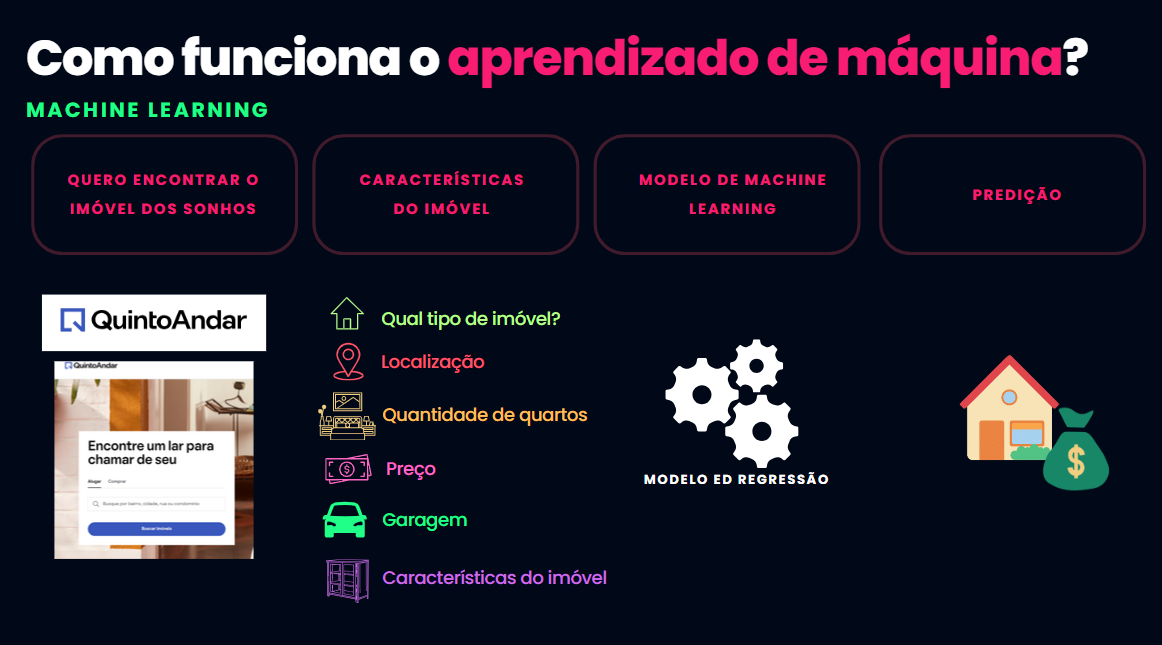

Próximo passo, vamos entender o **equilíbrio da base de dados**.



---


Quando estamos construindo um modelo de aprendizado de máquina, a análise do equilíbrio de classes é muito importante para manter as amostras de cada target de forma **representativa** durante o treinamento dos dados, ou seja, devemos garantir que cada tipo de categoria da variável target tenha a mesma representatividade em volume de dados durante o treinamento do algoritmo.

Vamos plotar um gráfico de barras para entender as proporções:

In [35]:
set(df['Target'])

{'Desistente', 'Graduado', 'Matriculado'}

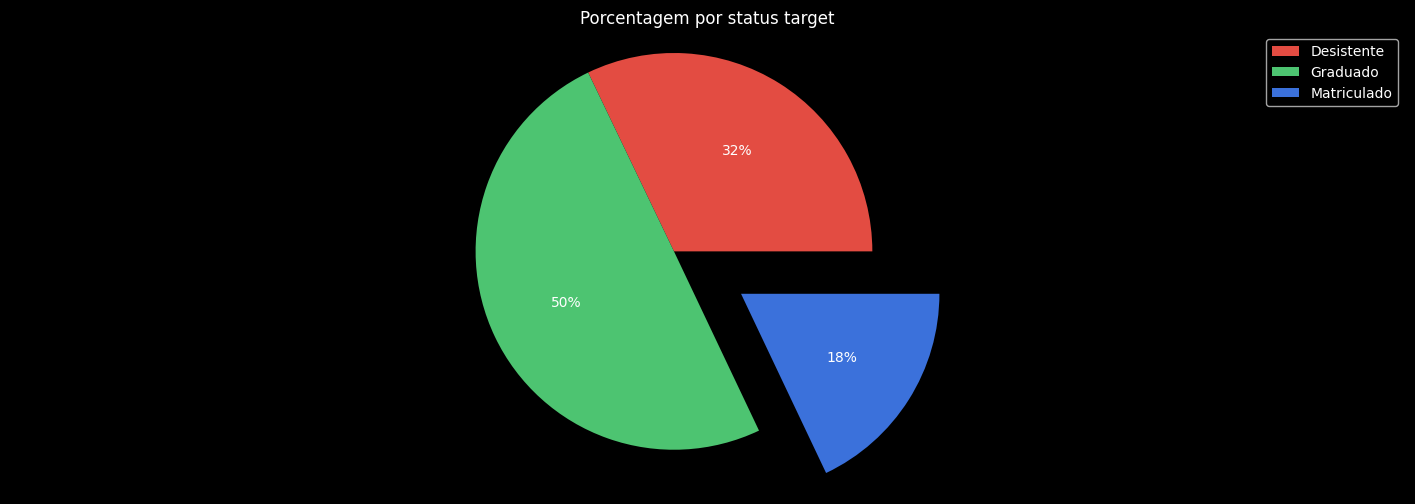

In [36]:
#Calcular o total de alunos(as) por tipo de status
df_targets_percent = df.groupby('Target')['Target'].count()

# Calculando a proporção de estudantes por categporia
total_estudantes = len(df)
df_target_porcentagem = df_targets_percent / total_estudantes * 100

#Separando os valores e nomes em uma lista, para deixar o gráfico mais apresentável
labels = df_target_porcentagem.index.tolist()
sizes = df_target_porcentagem.values.tolist()

#Criando o gráfico
plt.style.use('dark_background')
figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct='%1.0f%%', colors=[ '#e34c42','#4dc471','#3b71db'], labeldistance = 1.1,
           explode=[0, 0, .4])
grafico.axis('equal')
plt.title('Porcentagem por status target')
plt.legend(labels, loc='best')
plt.show()

OK, podemos concluir aqui que 50% da base contém estudantes graduados e 32% de estudantes evadidos, os demais 18% são estudantes ainda matriculados e ativos.

Será que precisamos trabalhar com os estudantes matriculados?

In [37]:
df_evadidos = df[df['Target'] == 'Desistente']
df_graduados = df[df['Target'] == 'Graduado']

df_concatenado = pd.concat([df_evadidos, df_graduados])

set(df_concatenado['Target'])

{'Desistente', 'Graduado'}

In [38]:
df_concatenado.shape

(3630, 28)

## Validando o equilíbrio das targets 🎯

Por que é importante validar a proporção das targets no modelo?

In [39]:
round(df_concatenado['Target'].value_counts(normalize = True)*100,2)

,proportion
Target,
Graduado,60.85
Desistente,39.15


Como podemos observar, a base de dados possui maior concentração de amostras para os estudantes graduados, o que pode ser um comportamento natural em faculdades, mas será que este problema de desequilíbrio pode afetar o aprendizado de máquina? Claramente, sim! O desequilíbrio de classes é um problema muito comum neste mundo de aprendizado de máquina e pode ser tratado de vários jeitos:

* Coleta de mais amostras das classes minoritárias.
* Aplicação de técnica de undersampling ou oversampling.

Neste notebook, vamos testar o undersampling.

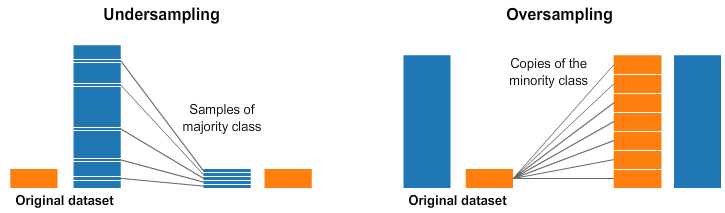

# Criando a pipeline

Uma pipeline de machine learning é uma **conjunto de etapas sequenciais que processam dados de maneira sistemática para treinar, validar e implementar um modelo de aprendizado de máquina**. Essas etapas permitem que o processo seja automatizado e repetível, o que facilita a implementação e a manutenção de modelos em produção.




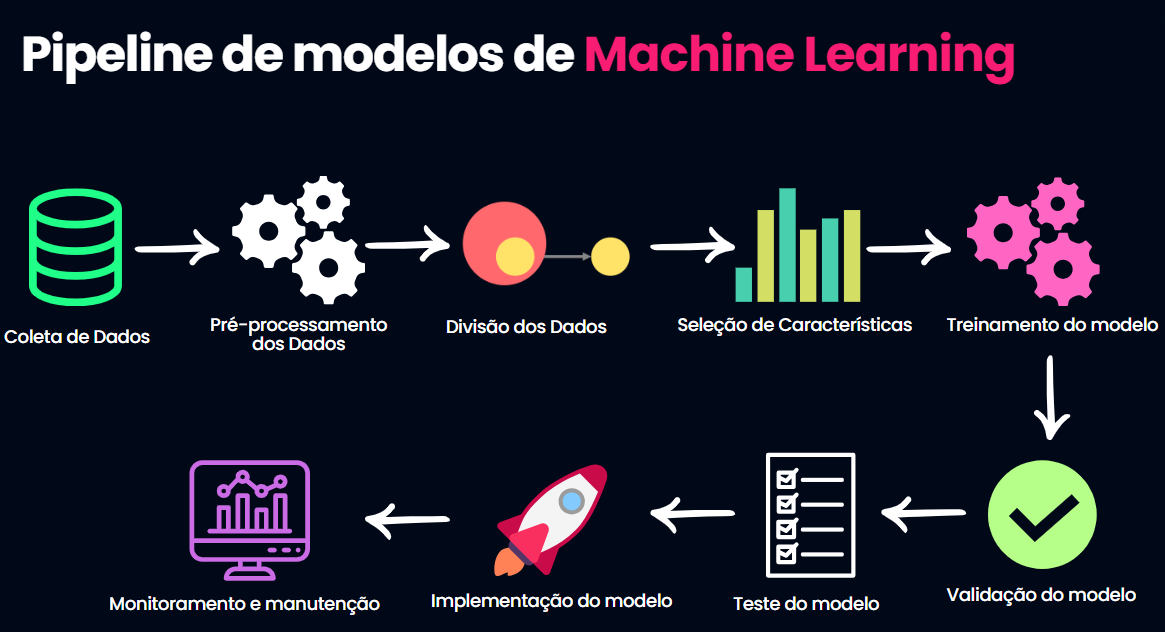

- **Coleta de Dados:** Obtenção dos dados de diversas fontes, como bancos de dados, arquivos CSV, APIs, etc.


- **Pré-processamento dos Dados:** Limpeza e transformação dos dados, que pode incluir a remoção de valores ausentes, normalização, padronização, codificação de variáveis categóricas, etc.

- **Divisão dos Dados:** Separação dos dados em conjuntos de treino, validação e teste.

- **Seleção de Características:** Escolha das características (features) mais relevantes para o modelo.

- **Treinamento do Modelo:** Aplicação de algoritmos de machine learning aos dados de treinamento para criar um modelo.

- **Validação do Modelo:** Avaliação do modelo usando o conjunto de validação para ajustar hiperparâmetros e evitar overfitting.

- **Teste do Modelo:** Verificação final do desempenho do modelo usando o conjunto de teste.

- **Implantação do Modelo:** Colocação do modelo em produção para fazer previsões sobre novos dados.

- **Monitoramento e Manutenção:** Monitoramento contínuo do desempenho do modelo e atualização conforme necessário.

In [40]:
df_concatenado.head()

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,0,0,1,Masculino,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Desistente
2,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,0,0,0,Masculino,0,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Desistente
7,Solteiro,Turismo,Ensino Secundário,119.0,Português,113.1,0,0,0,Masculino,0,0,0,5,5,0,0.0,0,0,5,5,0,0.0,0,15.5,2.8,-4.06,Desistente
9,Solteiro,Serviço Social,Ensino Secundário,138.0,Português,123.0,0,1,0,Feminino,0,0,0,6,9,5,11.4,0,0,6,14,2,13.5,0,8.9,1.4,3.51,Desistente
12,Solteiro,Ensino Básico,Ensino Secundário,133.0,Português,130.2,0,0,1,Feminino,0,0,0,6,6,0,0.0,0,0,6,0,0,0.0,0,12.7,3.7,-1.70,Desistente


# **Criação da pipeline 🚀**

**CatBoostEncoder**

CatBoostEncoder usa a média das variáveis alvo (target) para codificar cada categoria. Para cada categoria, calcula a média dos valores da variável alvo para as amostras que pertencem a essa categoria.

Calcula a Média de Alvo Condicional: O CatBoost Encoder substitui os valores categóricos pela média dos valores alvo (target) condicionada àquela categoria. Por exemplo, se você tem uma variável categórica "Cidade" e uma variável alvo "Preço", ele calculará a média dos preços para cada cidade.

**Benefícios do CatBoost Encoder**
- Redução de Overfitting
- Melhora na Precisão: Ao capturar a relação entre variáveis categóricas e o alvo de uma maneira mais informativa, o CatBoost Encoder pode melhorar a precisão do modelo em comparação com codificações mais simples, como one-hot encoding ou label encoding.
- Eficiência: Em contraste com o one-hot encoding, que pode gerar um grande número de features e, portanto, aumentar a complexidade computacional, o CatBoost Encoder produz uma representação compacta e eficiente das variáveis categóricas.


**Min-Max Scaler**

O Min-Max Scaler é uma técnica de normalização de dados que escala os valores de uma característica para um intervalo específico, geralmente [0, 1].

In [43]:
df_concatenado['Target'] = df_concatenado['Target'].replace({'Desistente': 0, 'Graduado': 1}) #binário

X = df_concatenado[['QualificacaoAnteriorGrau', 'NotaAdmissao', 'UnidadesCurriculares1SemestreCreditado', 'UnidadesCurriculares1SemestreInscrito',
                       'UnidadesCurriculares1SemestreAvaliacoes',  'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau',
                       'TaxaDesemprego', 'TaxaInflacao', 'PIB', 'EstadoCivil', 'Curso', 'QualificacaoAnterior']] #caracteristicas

y = df_concatenado['Target'] #target



In [47]:
! pip install category_encoders

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler

# Separar as variáveis numéricas e categóricas
categorical_cols = ['EstadoCivil', 'Curso', 'QualificacaoAnterior']
numerical_cols = ['QualificacaoAnteriorGrau', 'NotaAdmissao', 'UnidadesCurriculares1SemestreCreditado', 'UnidadesCurriculares1SemestreInscrito',
                       'UnidadesCurriculares1SemestreAvaliacoes',  'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau',
                       'TaxaDesemprego', 'TaxaInflacao', 'PIB']

# Criar o pipeline
pipeline = Pipeline([
    ('encoder', CatBoostEncoder(cols=categorical_cols, random_state=42)),
    ('scaler', MinMaxScaler())
])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar o pipeline aos dados de treino
X_train_transformed = pipeline.fit_transform(X_train, y_train)

# Aplicar o pipeline aos dados de teste (usando o fit do treino)
X_test_transformed = pipeline.transform(X_test)

In [49]:
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_predict

def treinar_e_avaliar_modelo(modelo, X_train_transformed, y_train, X_test_transformed, y_test):
    # Treinar o modelo com validação cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Validação cruzada estratificada
    y_pred = cross_val_predict(modelo, X_train_transformed, y_train, cv=cv)

    # Avaliar o modelo na base de treino
    #print("Relatório de Classificação (Treino):")
    #print(classification_report(y_train, y_pred))

    # Calcular a curva ROC na base de treino
    y_prob = cross_val_predict(modelo, X_train_transformed, y_train, cv=cv, method='predict_proba')[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Avaliar o modelo na base de teste
    y_pred_test = modelo.predict(X_test_transformed)
    print("\nRelatório de Classificação (Teste):")
    print(classification_report(y_test, y_pred_test))

    # Calcular a curva ROC na base de teste
    y_prob_test = modelo.predict_proba(X_test_transformed)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plotar a curva ROC (treino e teste)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Curva ROC (Treino) (área = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Curva ROC (Teste) (área = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC (Treino e Teste)')
    plt.legend(loc="lower right")
    plt.show()



Testando algoritmos de classificação

## KNN

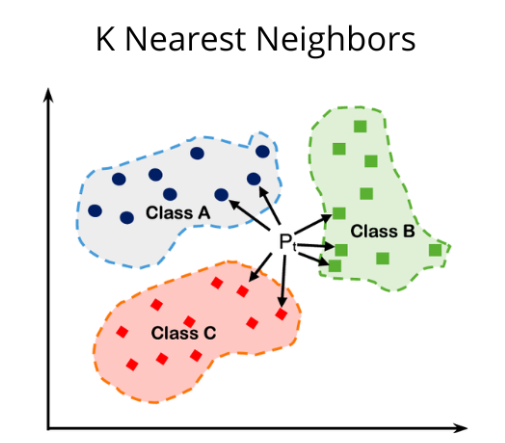

Não paramétrico (não tem uma função matemática definida). O algoritmo utiliza a **distância Euclidiana** (Teorema de Pitágoras) para realizar a **distância entre os pontos mais próximos** (vizinhos mais próximos).

**Vantagens**
- Rápido em datasets pequenos.
- Como as predições são baseadas em votos de vizinhos, o KNN é relativamente robusto a outliers e ruído nos dados.

**Desvantagens**
 - Se K for muito pequeno, a classificação fica sensível ter ruídos. Se k é muito grande, a vizinhança pode incluir elementos de outras classes.
 - O desempenho do KNN pode diminuir em conjuntos de dados de alta dimensionalidade, devido à chamada "maldição da dimensionalidade".
 - A medida de distância torna-se menos significativa em espaços de alta dimensão.A presença de atributos irrelevantes ou não informativos pode afetar negativamente o desempenho do KNN, pois a medida de distância pode ser afetada.
 - Se uma classe for significativamente mais prevalente do que outras, o KNN pode favorecer a classe majoritária, resultando em previsões enviesadas.

**Link da biblioteca:**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       301
           1       0.79      0.89      0.84       425

    accuracy                           0.79       726
   macro avg       0.80      0.78      0.78       726
weighted avg       0.80      0.79      0.79       726



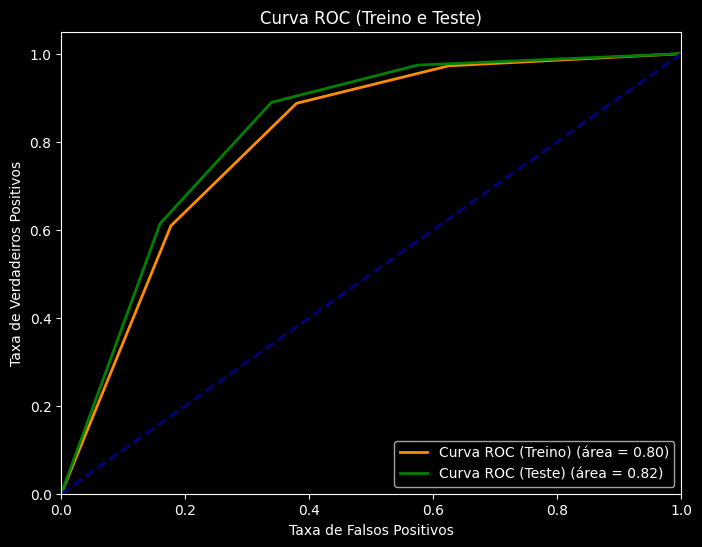

In [50]:
from sklearn.neighbors import KNeighborsClassifier
# Inicializar e treinar o modelo (exemplo com KNN)
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train_transformed, y_train)

# Avaliar o modelo
treinar_e_avaliar_modelo(modelo_knn, X_train_transformed, y_train, X_test_transformed, y_test)


 ## Random Forest

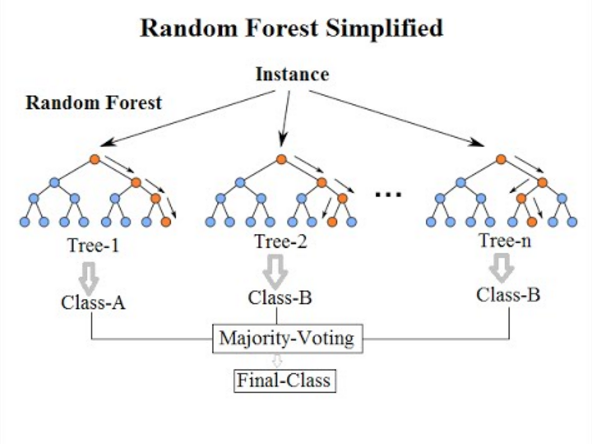

Várias árvores de decisões (o algoritmo de forma inteliente, **inicializa várias árvores de decisões, calcula o ganho de informação (entropia) e posteriormente é calculado uma moda com base na árvore que possui a maior frequência de baloes (nós)** dado a análise de todas as possibilidades possíveis).

**Vantagens**
- Gera de forma mais precisa qual é a melhor árvore de decisão possível.
- A Random Forest constrói várias árvores de decisão independentes, e as combina para reduzir o overfitting. A média ou a votação entre várias árvores ajuda a generalizar melhor para dados não vistos.
- Como as Random Forests combinam várias árvores, são mais estáveis e robustas em comparação com árvores de decisão individuais.
- Pode lidar melhor com conjuntos de dados desbalanceados, pois a média ou votação entre várias árvores ajuda a mitigar o viés em direção à classe majoritária.
- A Random Forest é capaz de capturar relações não lineares nos dados, especialmente quando se utiliza o "bootstrap" e subamostragem aleatória de features.

**Desvantagens**
- Deve-se utilizar técnicas de poda para evitar overfiting.
- Apesar de ser mais robusta, a Random Forest é menos interpretável do que uma única árvore de decisão, especialmente à medida que o número de árvores na floresta aumenta.
- Em comparação com árvores de decisão individuais, a Random Forest pode ser mais computacionalmente intensiva e levar mais tempo para treinar, principalmente em grandes conjuntos de dados.

**Link da biblioteca:**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       301
           1       0.84      0.93      0.89       425

    accuracy                           0.86       726
   macro avg       0.87      0.84      0.85       726
weighted avg       0.86      0.86      0.86       726



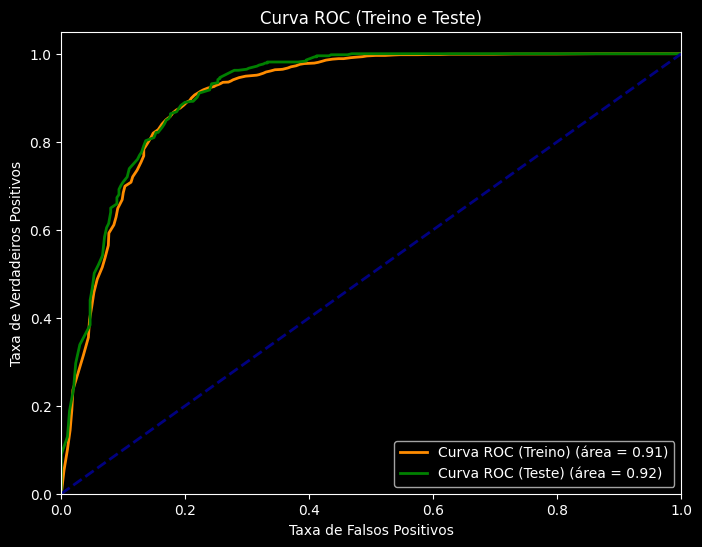

In [51]:
from sklearn.ensemble import RandomForestClassifier
# Inicializar e treinar o modelo (exemplo com RandomForestClassifier)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_transformed, y_train)

# Avaliar o modelo
treinar_e_avaliar_modelo(modelo, X_train_transformed, y_train, X_test_transformed, y_test)

# Feature Importance

A técnica de  Feature Importance auxilia na compreensão das features que são mais impactantes e discriminantes para os modelos de aprendizado de máquina.  Essa técnica pode até mesmo auxiliar na interpretação dos resultados do modelo.



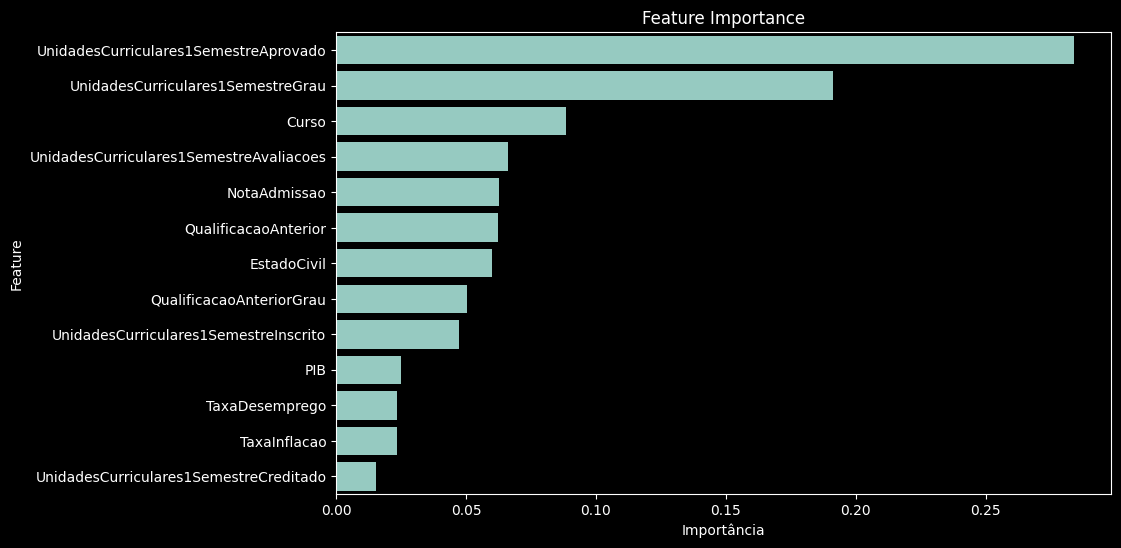

In [52]:
# Feature Importance
feature_importances = modelo.feature_importances_
feature_names = numerical_cols + categorical_cols

# Criar DataFrame para visualização
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importância': feature_importances})
df_feature_importance = df_feature_importance.sort_values(by='Importância', ascending=False)


# Plotar o gráfico de Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=df_feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.show()

# **Equilibrando a target ⚖️**

Undersampling é uma técnica de pré-processamento usada em problemas de classificação, especialmente quando há um desequilíbrio significativo entre as classes, ou seja, uma classe está muito mais presente do que a outra. O objetivo do undersampling é balancear a distribuição das classes para melhorar o desempenho do modelo.


In [53]:
from imblearn.under_sampling import RandomUnderSampler

# Inicializa o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplica o undersampling no conjunto de dados
X_resampled, y_resampled = rus.fit_resample(df_concatenado.drop('Target', axis=1), df_concatenado['Target'])

# Cria um novo DataFrame com os dados balanceados
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Target'])], axis=1)

In [54]:
df_balanced.shape

(2842, 28)

In [55]:
df_balanced['Target'].value_counts()

,count
Target,
0,1421
1,1421


# Testando a pipeline com os dados equilibrados  🎯

In [56]:
df_balanced['Target'] = df_balanced['Target'].replace({'Desistente': 0, 'Graduado': 1})

X = df_balanced[['UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau','Curso','UnidadesCurriculares1SemestreAvaliacoes',
'NotaAdmissao','QualificacaoAnterior','EstadoCivil','Nacionalidade','UnidadesCurriculares1SemestreInscrito','QualificacaoAnteriorGrau',
'PIB','TaxaDesemprego','TaxaInflacao', 'UnidadesCurriculares1SemestreCreditado']] #caracteristicas

y = df_balanced['Target'] #target

In [57]:
# Separar as variáveis numéricas e categóricas
categorical_cols = ['Curso','EstadoCivil','Nacionalidade','QualificacaoAnterior']
numerical_cols = ['UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau','UnidadesCurriculares1SemestreAvaliacoes',
'NotaAdmissao','UnidadesCurriculares1SemestreInscrito','QualificacaoAnteriorGrau',
'PIB','TaxaDesemprego','TaxaInflacao', 'UnidadesCurriculares1SemestreCreditado']

# Criar o pipeline
pipeline = Pipeline([
    ('encoder', CatBoostEncoder(cols=categorical_cols, random_state=42)),
    ('scaler', MinMaxScaler())
])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar o pipeline aos dados de treino
X_train_transformed = pipeline.fit_transform(X_train, y_train)

# Aplicar o pipeline aos dados de teste (usando o fit do treino)
X_test_transformed = pipeline.transform(X_test)


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       287
           1       0.82      0.90      0.86       282

    accuracy                           0.85       569
   macro avg       0.86      0.85      0.85       569
weighted avg       0.86      0.85      0.85       569



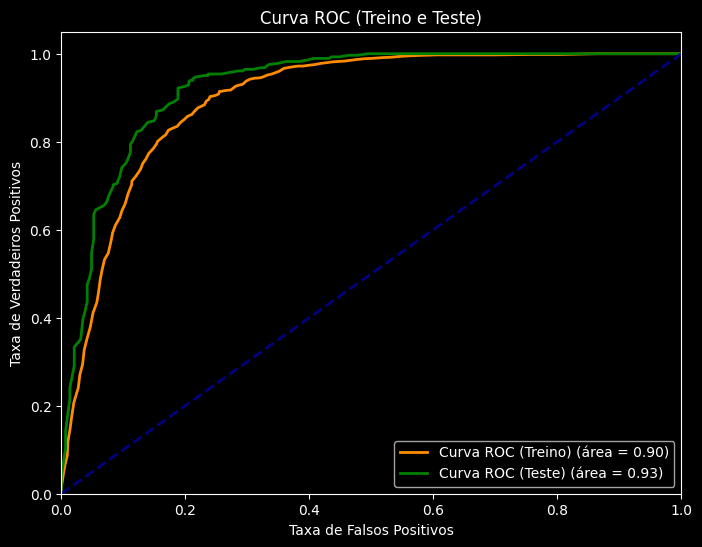

In [58]:
modelo_upgrade = RandomForestClassifier(random_state=42)
modelo_upgrade.fit(X_train_transformed, y_train)

# Avaliar o modelo
treinar_e_avaliar_modelo(modelo_upgrade, X_train_transformed, y_train, X_test_transformed, y_test)

In [59]:
import pickle

# Salve a pipeline
filename = 'modelo_upgrade.pkl'
pickle.dump(modelo_upgrade, open(filename, 'wb'))


# Testando no modelo em novos dados

In [60]:
df_validacao = pd.read_excel('StudentsPreparedValidação.xlsx')

# Selecione as features relevantes para a predição
X_validacao = df_validacao[['UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau','Curso','UnidadesCurriculares1SemestreAvaliacoes',
'NotaAdmissao','QualificacaoAnterior','EstadoCivil','Nacionalidade','UnidadesCurriculares1SemestreInscrito','QualificacaoAnteriorGrau',
'PIB','TaxaDesemprego','TaxaInflacao', 'UnidadesCurriculares1SemestreCreditado']]

# Separar as variáveis numéricas e categóricas
categorical_cols = ['Curso','EstadoCivil','Nacionalidade','QualificacaoAnterior']
numerical_cols = ['UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreGrau','UnidadesCurriculares1SemestreAvaliacoes',
'NotaAdmissao','UnidadesCurriculares1SemestreInscrito','QualificacaoAnteriorGrau',
'PIB','TaxaDesemprego','TaxaInflacao', 'UnidadesCurriculares1SemestreCreditado']

X_validacao_transformed = pipeline.transform(X_validacao)

# Faça a predição usando o pipeline treinado
y_pred = modelo_upgrade.predict(X_validacao_transformed)

# Adicione as predições ao DataFrame de validação
df_validacao['Predição'] = y_pred
df_validacao.head()


,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Predição
0,Solteiro,Serviço Social,Ensino Secundário,137.0,Português,137.4,0,0,1,Feminino,0,0,0,6,10,1,1.200000e+01,0,0,6,14,2,11.0,0,10.8,1.4,1.74,0
1,Solteiro,Ensino Básico,Ensino Secundário,140.0,Português,124.6,0,0,1,Feminino,0,0,0,7,7,6,1.166667e+16,0,0,7,8,6,13.5,0,16.2,0.3,-0.92,1
2,Solteiro,Higiene Oral,Ensino Secundário,127.0,Português,121.8,0,0,1,Feminino,0,0,0,7,14,7,1.143750e+05,0,0,8,9,8,11425.0,0,12.7,3.7,-1.70,1
3,Solteiro,Serviço Social,Ensino Secundário,151.0,Português,157.0,0,1,1,Feminino,1,0,0,6,8,5,1.160000e+01,0,0,6,12,4,11.0,0,7.6,2.6,0.32,1
4,Solteiro,Enfermagem Veterinária,Ensino Secundário,138.0,Português,131.0,0,0,1,Feminino,0,0,0,5,9,5,1.266667e+16,2,0,5,7,4,13.0,0,9.4,-0.8,-3.12,1
